# 4. Explore the Data

> "I don't know, what I don't know"

We want to first **visually explore** the data to see if we can confirm some of our initial hypotheses as well as make new hypothesis about the problem we are trying to solve.

For this we will start by loading the data and understanding the data structure of the dataframe we have.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [65]:
df.shape

(10227, 10)

### Data Structure

So we have ten columns in our dataset. Let us understand what each one is.

Three are about the location of the Wholesale Market where Onion where sold.
- **state**: This is the 2/3 letter abbreviation for the state in India (PB is Punjab and so on)
- **city**: This is the city in India (ABOHAR, BANGALORE and so on)
- **market**: This is a string with the combination of the state and city

Three are related to the 
- **month**: Month in January, February and so on. 
- **year**: Year in YYYY representastion
- **date**: The combination of the two above.

Four are about quantity and price in these wholesale market. 
- **quantity**: The quanity of Onion arriving in the market in that month in quintals (100 kg)
- **priceMin**: The minimum price in the month in Rs./quintal
- **priceMax**: The maximum price in the month in Rs./quintal
- **priceMod**: The modal price in the month in Rs./quintal

We would expect the following the columns to be of the following type
- **CATEGORICAL**: state, city, market
- **TIME INTERVAL**: month, year, date
- **QUANTITATIVE**: quantity, priceMin, priceMax, priceModal


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
market      10227 non-null object
month       10227 non-null object
year        10227 non-null int64
quantity    10227 non-null int64
priceMin    10227 non-null int64
priceMax    10227 non-null int64
priceMod    10227 non-null int64
state       10227 non-null object
city        10227 non-null object
date        10227 non-null object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


So we are getting the quantitive columns are correctly being shown as integers and the categorical columns are showing as objects(strings) which is fine. 
However, the `date` columns is being read as an object and not a Time-Interval. Let us at least fix the `date` column and make it into a datetime object

In [67]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [68]:
pd.unique(df.city)

array(['ABOHAR', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR', 'AJMER', 'ALIGARH',
       'ALWAR', 'AMRITSAR', 'BALLIA', 'BANGALORE', 'BAREILLY', 'BELGAUM',
       'BHATINDA', 'BHAVNAGAR', 'BHOPAL', 'BHUBNESWER', 'BIHARSHARIF',
       'BIJAPUR', 'BIKANER', 'BOMBORI', 'BURDWAN', 'CHAKAN', 'CHALLAKERE',
       'CHANDIGARH', 'CHANDVAD', 'CHENNAI', 'CHICKBALLAPUR', 'COIMBATORE',
       'DEESA', 'DEHRADOON', 'DELHI', 'DEORIA', 'DEVALA', 'DEWAS',
       'DHAVANGERE', 'DHULIA', 'DINDIGUL', 'DINDORI', 'ETAWAH', 'GONDAL',
       'GORAKHPUR', 'GUWAHATI', 'HALDWANI', 'HASSAN', 'HOSHIARPUR',
       'HUBLI', 'HYDERABAD', 'INDORE', 'JAIPUR', 'JALANDHAR', 'JALGAON',
       'JAMMU', 'JAMNAGAR', 'JODHPUR', 'JUNNAR', 'KALVAN', 'KANPUR',
       'KARNAL', 'KHANNA', 'KOLAR', 'KOLHAPUR', 'KOLKATA', 'KOPERGAON',
       'KOTA', 'KURNOOL', 'LASALGAON', 'LONAND', 'LUCKNOW', 'LUDHIANA',
       'MADURAI', 'MAHUVA', 'MALEGAON', 'MANDSOUR', 'MANMAD', 'MEERUT',
       'MIDNAPUR', 'MUMBAI', 'NAGPUR', 'NANDGAON', 'NASIK', 'NEEMU


### Question 1 - How big is the Bangalore onion market compared to other cities in India?

Let us try to do this examination for one of the year only. So we want to reduce our dataframe for only where the year = 2010 

This process is called subset.

In [69]:
df2010 = df[df.year ==2010]
df2010.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
10,ABOHAR(PB),February,2010,555,1143,1460,1322,PB,ABOHAR,2010-02-01
18,ABOHAR(PB),March,2010,385,510,878,688,PB,ABOHAR,2010-03-01
25,ABOHAR(PB),April,2010,840,466,755,611,PB,ABOHAR,2010-04-01
32,ABOHAR(PB),May,2010,2050,391,578,494,PB,ABOHAR,2010-05-01


To reduce our dataframe for only where the year = 2010 and city = Bangalore.

In [70]:
df2010_bang = df[(df.year ==2010)& (df.city =="BANGALORE")]
df2010_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
722,BANGALORE,January,2010,423649,502,1837,1267,KNT,BANGALORE,2010-01-01
735,BANGALORE,February,2010,316685,495,1429,1011,KNT,BANGALORE,2010-02-01
748,BANGALORE,March,2010,368644,386,895,661,KNT,BANGALORE,2010-03-01
760,BANGALORE,April,2010,404805,287,730,545,KNT,BANGALORE,2010-04-01
772,BANGALORE,May,2010,395519,306,827,564,KNT,BANGALORE,2010-05-01


###  Principle: Split Apply Combine

How do we get the sum of quantity for each city.

We need to **SPLIT** the data by each city, **APPLY** the sum to the quantity row and then **COMBINE** the data again


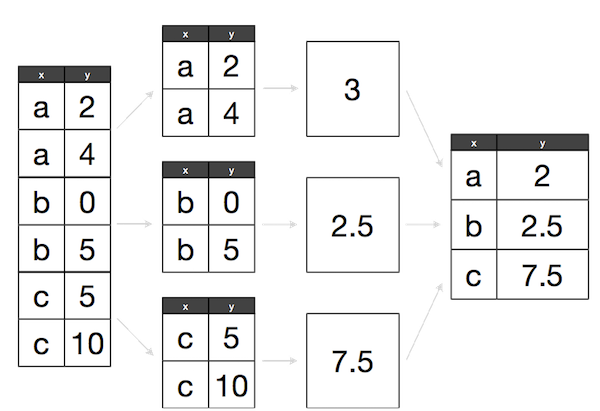


In pandas, we use the `groupby` function to do this.

In [71]:
df2010_city = df2010.groupby(["city"]).sum()
df2010_city.head()

,year,quantity,priceMin,priceMax,priceMod
city,,,,,
ABOHAR,24120,11835,10896,16130,14012
AGRA,24120,756755,13213,14827,14149
AHMEDABAD,24120,1135418,8910,15819,13539
AHMEDNAGAR,24120,1678032,3955,20984,12923
ALWAR,24120,561145,8850,14717,11317


####  If we only want to apply the sum function on quantity, then we specify the quantity column

In [72]:
df2010_city = df2010.groupby(['city'],as_index=False).quantity.sum()
df2010_city.head()

,city,quantity
0,ABOHAR,11835
1,AGRA,756755
2,AHMEDABAD,1135418
3,AHMEDNAGAR,1678032
4,ALWAR,561145


In [73]:
# Sort the Dataframe by Quantity to see which one is on top
df2010_city = df2010_city.sort_values(by = "quantity", ascending = False)
df2010_city.head()

,city,quantity
6,BANGALORE,6079067
16,DELHI,3508582
39,KOLKATA,3495320
56,PUNE,3326024
67,SOLAPUR,3310419


## Data Visualization

In [74]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

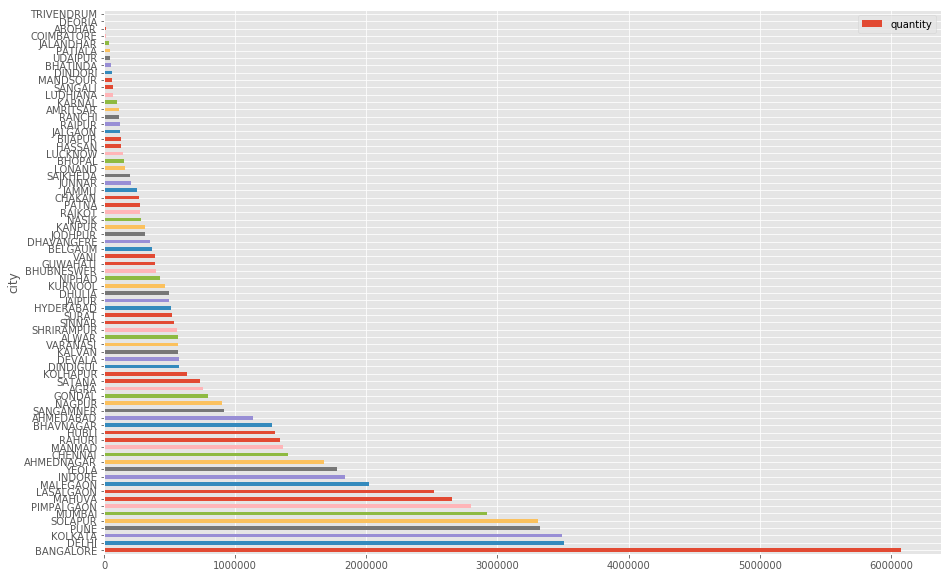

In [75]:
# Plot the Data
df2010_city.plot(kind ="barh", x = 'city', y = 'quantity')
plt.show()

## Question 2 - Have the price variation in Onion prices in Bangalore really gone up over the years?

In [76]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [78]:
df_bang = df[df.city == "BANGALORE"]
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
717,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
718,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
719,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
720,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01


In [85]:
# for easy undersatnding the numbers in describe function, we set precision to 0
pd.set_option("precision", 0)
df_bang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,1e+02,146,146,146
mean,2010,5e+05,558,1314,1044
std,4,3e+05,381,911,668
min,2004,6e+04,145,338,320
25%,2007,3e+05,307,685,551
50%,2010,4e+05,448,1019,836
75%,2013,7e+05,653,1636,1326
max,2016,2e+06,2377,4698,3430


### Setting index by Date

In [87]:
df_bang.index

Int64Index([716, 717, 718, 719, 720, 721, 722, 723, 724, 725,
            ...
            852, 853, 854, 855, 856, 857, 858, 859, 860, 861],
           dtype='int64', length=146)

In [89]:
# set the index as date
df_bang = df_bang.sort_values(by="date")
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
729,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
742,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
754,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
766,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [90]:
# Set the Index for the Dataframe
df_bang.index = pd.PeriodIndex(df_bang.date, freq='M')
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


### Visualization of prices over time

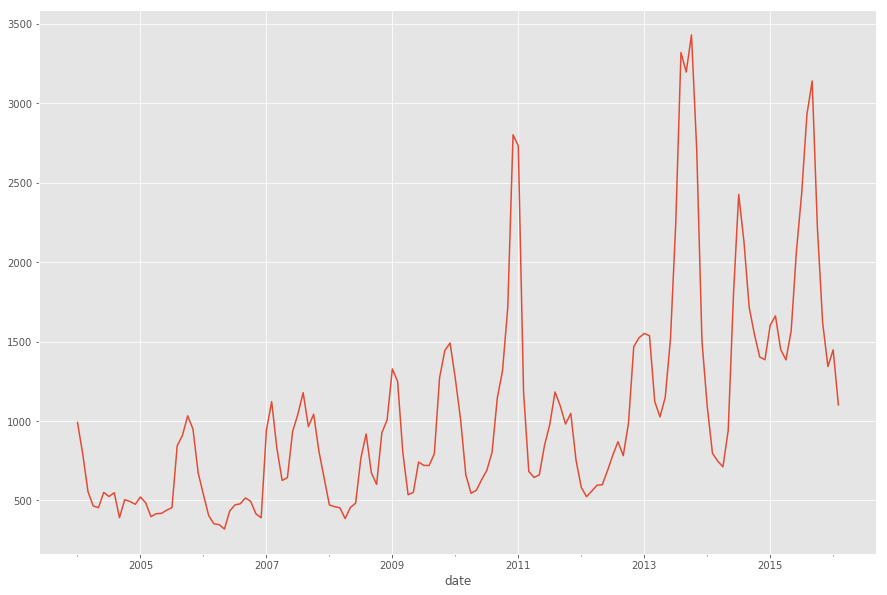

In [92]:
df_bang.priceMod.plot()
plt.show()

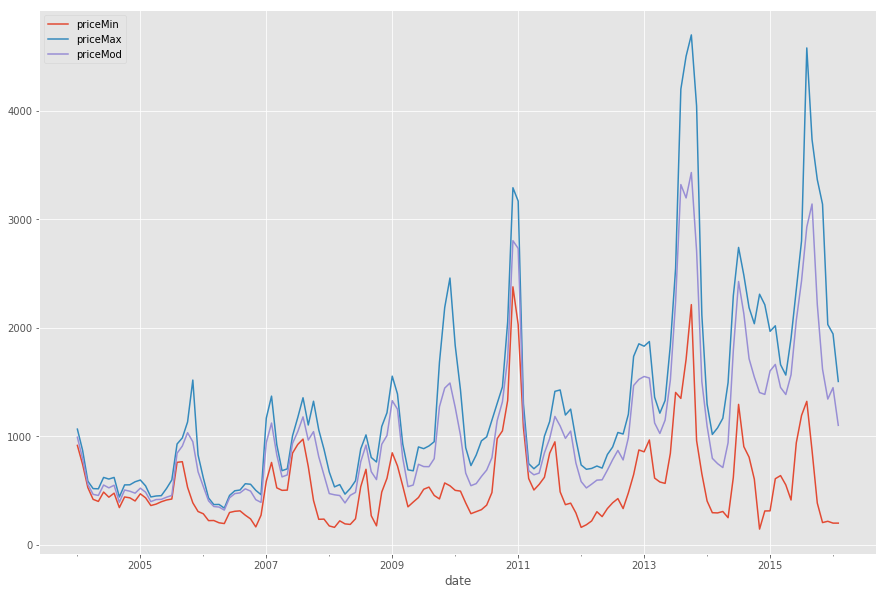

In [94]:
df_bang.plot(kind="line", y=["priceMin" ,"priceMax" ,"priceMod"])
plt.show()

#### To calculate the range of change, we will create a new price difference variable - which is the difference between the priceMin and priceMax

In [95]:
df_bang["priceDiff"] = df_bang["priceMax"] - df_bang["priceMin"]
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff
date,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,150
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,129
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,59
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,99
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,116


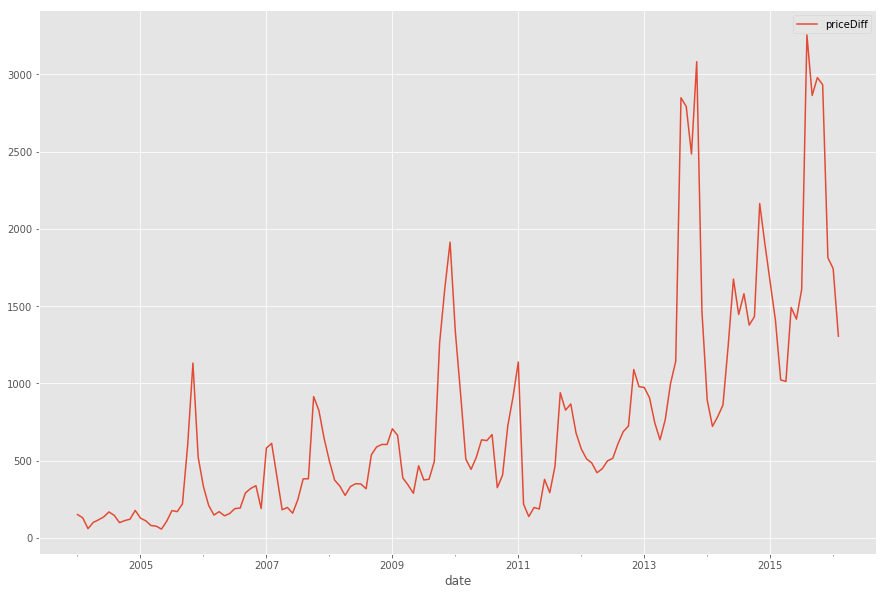

In [98]:
df_bang.plot(y="priceDiff")
plt.show()

## Pivot Table

Pivot table is a way to summarize data frame data into index (rows), columns and value

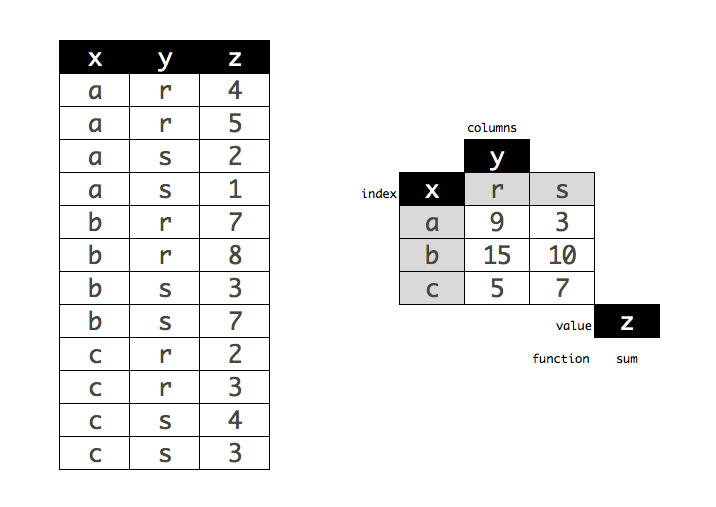

In [100]:
# a new column for the intger month
df_bang["monthVal"] = pd.DatetimeIndex(df_bang["date"]).month
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff,monthVal
date,,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,150,1
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,129,2
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,59,3
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,99,4
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,116,5


In [101]:
df_bangPivot = pd.pivot_table(df_bang, values = "priceDiff", 
                             columns = "year", index = "monthVal")
df_bangPivot

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
monthVal,,,,,,,,,,,,,
1,150,127,331,581,497,706,1335,1138,575,973,892,1654,1743
2,129,110,209,611,373,663,934,218,511,907,721,1409,1305
3,59,79,147,398,334,387,509,137,484,745,784,1022,NaN
4,99,75,169,181,274,341,443,196,421,634,859,1012,NaN
5,116,56,142,196,331,288,521,186,447,764,1245,1491,NaN
6,135,107,157,159,350,466,634,378,498,997,1675,1416,NaN
7,167,176,189,248,348,374,629,292,514,1143,1446,1608,NaN
8,145,169,192,381,317,379,668,465,609,2849,1580,3256,NaN
9,98,219,290,382,537,495,324,939,687,2793,1377,2864,NaN


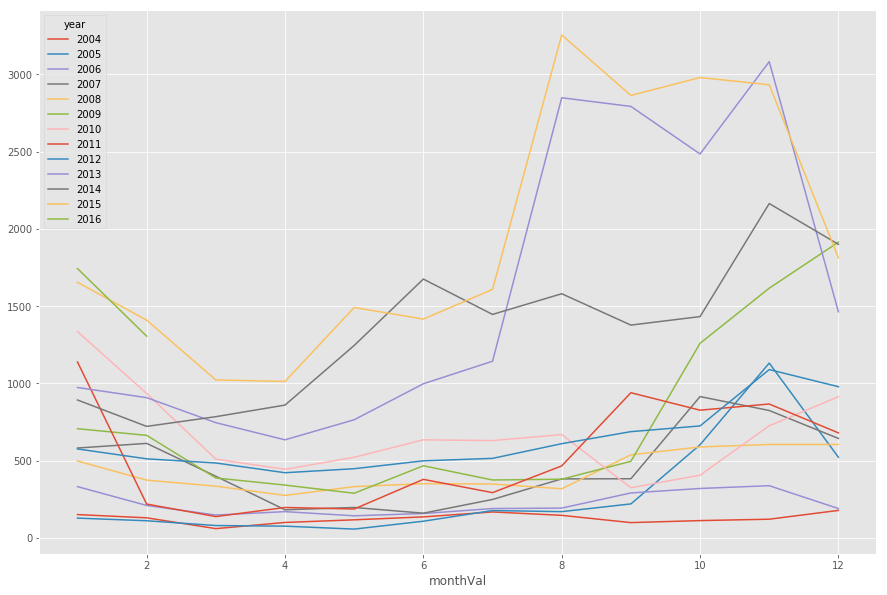

In [103]:
df_bangPivot.plot()
plt.show()

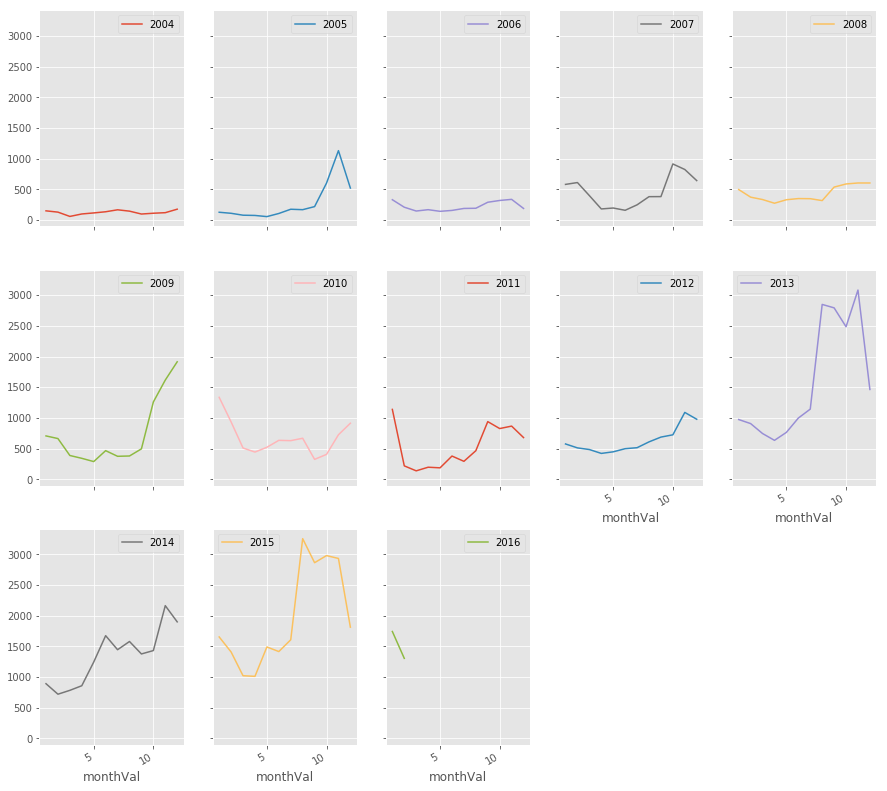

In [104]:
df_bangPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)
plt.show()